In [179]:
import pandas as pd
from pandas.plotting import parallel_coordinates
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
df_climate = pd.read_csv('./../db/GlobalLandTemperaturesByCountry.csv')
print(df_climate.shape)
print(df_climate.head())

(577462, 4)
           dt  AverageTemperature  AverageTemperatureUncertainty Country
0  1743-11-01                 4.4                            2.3   Åland
1  1743-12-01                 NaN                            NaN   Åland
2  1744-01-01                 NaN                            NaN   Åland
3  1744-02-01                 NaN                            NaN   Åland
4  1744-03-01                 NaN                            NaN   Åland


In [144]:
# .info()
# Resumen del df y consumo de memoria
print(df_climate.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 13.2+ MB
None


In [145]:
# Acceder a los valores unicos de una columna
print(df_climate['Country'].unique())


['Åland' 'Afghanistan' 'Africa' 'Albania' 'Algeria' 'American Samoa'
 'Andorra' 'Angola' 'Anguilla' 'Antarctica' 'Antigua And Barbuda'
 'Argentina' 'Armenia' 'Aruba' 'Asia' 'Australia' 'Austria' 'Azerbaijan'
 'Bahamas' 'Bahrain' 'Baker Island' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia'
 'Bonaire, Saint Eustatius And Saba' 'Bosnia And Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Bulgaria' 'Burkina Faso' 'Burma'
 'Burundi' "Côte D'Ivoire" 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde'
 'Cayman Islands' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Christmas Island' 'Colombia' 'Comoros'
 'Congo (Democratic Republic Of The)' 'Congo' 'Costa Rica' 'Croatia'
 'Cuba' 'Curaçao' 'Cyprus' 'Czech Republic' 'Denmark (Europe)' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia' 'Europe'
 'Falkland Islands (Islas Malvinas)' 'Faroe Islands'
 'Federated States Of

In [146]:
# Seteando columna de tipo tiempo
df_climate['date'] = pd.to_datetime(df_climate['dt'])
print(df_climate.dtypes)

dt                                       object
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
Country                                  object
date                             datetime64[ns]
dtype: object


In [147]:
# Creando una serie como filtro
idx_filtro = df_climate['date'] > pd.to_datetime('1970-01-01')
df_climate = df_climate[idx_filtro]
print(df_climate.shape)


(127332, 5)


In [148]:
apply_functions = {
    'AverageTemperature': [np.mean, np.median]
}

df_avg = df_climate.groupby(['Country',
                             pd.Grouper(key='date', freq='1Y')]).aggregate(apply_functions)
print(df_avg)

# Filtro de filas, devolviendo otra columna agrupada
print(df_avg.loc['Mexico']['AverageTemperature'])

                       AverageTemperature       
                                     mean median
Country     date                                
Afghanistan 1970-12-31               16.0   16.2
            1971-12-31               14.8   14.9
            1972-12-31               12.5   13.9
            1973-12-31               14.2   14.9
            1974-12-31               13.3   13.6
...                                   ...    ...
Åland       2009-12-31                6.5    5.6
            2010-12-31                4.9    4.8
            2011-12-31                7.2    7.5
            2012-12-31                6.1    6.3
            2013-12-31                6.2    6.0

[10692 rows x 2 columns]
            mean  median
date                    
1970-12-31  21.0    21.5
1971-12-31  20.6    20.7
1972-12-31  21.0    22.1
1973-12-31  20.5    20.8
1974-12-31  20.6    21.0
1975-12-31  20.4    21.0
1976-12-31  20.1    20.4
1977-12-31  20.8    21.1
1978-12-31  20.8    21.3
1979-12-31  2

In [149]:
# Un df a partir de una agrupacion, generando un id numerico
df_t_med = df_avg['AverageTemperature'][['median']].reset_index()
print(df_t_med.head(5))



       Country       date  median
0  Afghanistan 1970-12-31    16.2
1  Afghanistan 1971-12-31    14.9
2  Afghanistan 1972-12-31    13.9
3  Afghanistan 1973-12-31    14.9
4  Afghanistan 1974-12-31    13.6


In [150]:
# Extrayendo partes de fecha a partir de un tipo date
df_t_med['year'] = df_t_med['date'].dt.year
print(df_t_med.head(5))

       Country       date  median  year
0  Afghanistan 1970-12-31    16.2  1970
1  Afghanistan 1971-12-31    14.9  1971
2  Afghanistan 1972-12-31    13.9  1972
3  Afghanistan 1973-12-31    14.9  1973
4  Afghanistan 1974-12-31    13.6  1974


In [151]:
# Renombrando columnas
# columns={'current_name_column':'new_name_column'}
# inplace=True // modifica el mismo dataframe
df_t_med.rename(columns={'median': 'median_temperature'}, inplace=True)
print(df_t_med.head(5))

       Country       date  median_temperature  year
0  Afghanistan 1970-12-31                16.2  1970
1  Afghanistan 1971-12-31                14.9  1971
2  Afghanistan 1972-12-31                13.9  1972
3  Afghanistan 1973-12-31                14.9  1973
4  Afghanistan 1974-12-31                13.6  1974


In [152]:
# Tabla pivote
# values=['median_temperature'] // valor a calcular
#  index=['year'] // filas o agrupacion
# columns=['Country'] // columnas a pivotear horizontalmente
df_t_pivot = df_t_med.pivot_table(values=['median_temperature'], index=['year'], columns=['Country'])
df_t_pivot

median_temperature                                                \
Country        Afghanistan Africa Albania Algeria American Samoa Andorra   
year                                                                       
1970                  16.2   25.2    12.4    23.3           26.7    11.6   
1971                  14.9   24.8    11.7    22.8           26.5    11.9   
1972                  13.9   25.1    11.2    22.5           26.8    10.0   
1973                  14.9   25.3    11.8    23.0           27.0     9.6   
1974                  13.6   24.8    11.3    21.6           26.6     8.2   
1975                  13.5   24.8    12.4    23.1           26.7    10.4   
1976                  14.2   24.8    12.6    22.3           26.6     9.7   
1977                  15.7   25.0    12.0    23.5           26.7    10.4   
1978                  15.3   24.9    11.5    22.6           26.7     9.8   
1979                  16.3   25.4    11.8    23.1           26.8    10.4   
1980                  16.3   25.3    11.9    23.2           27.0     9.8   
1981                  14.4   25.3    13.3    24.6           26.8    11.2   
1982                  15.1   25.1    12.4    23.0           26.9    10.9   
1983                  13.6   25.4    12.7    24.0           27.0    11.2   
1984                  14.4   25.3    12.8    23.3           26.9    10.2   
1985                  14.9   24.9    12.6    23.3           26.8    11.2   
1986                  15.2   25.2    13.4    23.5           27.1    11.0   
1987                  13.6   25.6    12.6    24.7           27.1    11.5   
1988                  15.3   25.4    12.4    24.6           26.9    11.9   
1989                  14.6   25.1    12.9    23.7           26.8    11.2   
1990                  14.5   25.7    13.4    24.5           27.2    11.4   
1991                  14.4   25.3    11.6    23.0           27.1    10.0   
1992                  13.8   25.4    13.6    23.0           27.1    10.1   
1993                  14.1   25.7    13.7    23.8           27.1    10.1   
1994                  13.6   25.3    13.2    23.0           27.0    11.2   
1995                  14.5   25.5    11.9    23.1           27.3    12.2   
1996                  14.6   25.4    11.7    23.3           27.2    11.1   
1997                  15.2   25.4    10.8    23.5           27.0    12.7   
1998                  15.8   25.9    13.5    24.5           27.4    10.6   
1999                  15.6   25.6    13.5    25.6           27.0    11.7   
2000                  16.9   25.5    14.0    24.2           27.3    11.0   
2001                  16.4   25.8    13.7    25.3           27.3    12.7   
2002                  16.5   25.7    12.5    23.8           27.7    11.9   
2003                  15.5   26.0    12.1    25.4           27.0    11.1   
2004                  14.7   25.8    13.7    24.8           27.3    11.4   
2005                  15.5   26.1    12.4    25.3           27.5    12.1   
2006                  16.6   25.9    13.7    25.8           26.9    13.3   
2007                  15.5   25.7    13.2    24.3           27.5    12.3   
2008                  16.4   25.7    13.3    24.4           27.1    11.2   
2009                  13.9   25.9    13.2    23.8           26.9    11.7   
2010                  17.4   26.2    12.7    25.5           27.3    11.4   
2011                  16.0   25.6    12.4    24.1           27.0    13.5   
2012                  15.7   25.6    13.9    24.6           27.2    11.5   
2013                  18.1   25.8    15.9    26.4           27.7    10.9   

                                                       ...                     \
Country Angola Anguilla Antigua And Barbuda Argentina  ... Uruguay Uzbekistan   
year                                                   ...                      
1970      23.0     27.2                27.2      15.1  ...    15.8       15.5   
1971      22.5     26.5                26.4      14.8  ...    16.5       13.0   
1972      22.6     26.9       

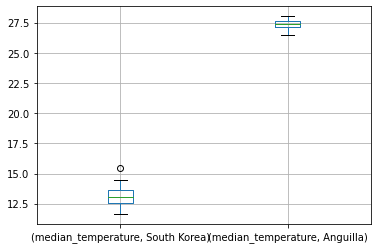

In [153]:
# Generando un grafico de caja de bigotes o boxplot
# .sample(value) // Escoge aletariamente la cantidad de registros especificados
df_t_pivot_sample = df_t_pivot.T.sample(2).T.boxplot()
plt.show()


In [154]:
# Importando otros archivos para unir
# header=2 // indica la posicion en la que empezara a leer
df_agri = pd.read_csv('./../db/API_AG.LND.AGRI.K2_DS2_en_csv_v2_716226.csv', header=2)
df_fore = pd.read_csv('./../db/API_AG.LND.FRST.K2_DS2_en_csv_v2_716262.csv', header=2)
df_elec = pd.read_csv('./../db/API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_715482.csv', header=2)
df_co2e = pd.read_csv('./../db/API_EN.ATM.CO2E.KT_DS2_en_csv_v2_713263.csv', header=2)
df_popu = pd.read_csv('./../db/API_SP.POP.TOTL_DS2_en_csv_v2_713131.csv', header=2)

print(df_agri.shape)
print(df_fore.shape)
print(df_elec.shape)
print(df_co2e.shape)
print(df_popu.shape)


(264, 65)
(264, 65)
(264, 65)
(264, 65)
(264, 65)


In [155]:
df_agri.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,Agricultural land (sq. km),AG.LND.AGRI.K2,NaN,20.0,20.0,20.0,20.0,20.0,...,20.0,20.0,20.0,20.0,20.0,20.0,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Agricultural land (sq. km),AG.LND.AGRI.K2,NaN,"377,000.0","377,600.0","378,100.0","378,730.0","378,750.0",...,"379,100.0","379,100.0","379,100.0","379,100.0","379,100.0","379,100.0",NaN,NaN,NaN,NaN
2,Angola,AGO,Agricultural land (sq. km),AG.LND.AGRI.K2,NaN,"571,700.0","572,000.0","572,200.0","572,500.0","572,700.0",...,"589,900.0","589,900.0","591,900.0","591,900.0","591,900.0","591,900.0",NaN,NaN,NaN,NaN
3,Albania,ALB,Agricultural land (sq. km),AG.LND.AGRI.K2,NaN,"12,320.0","12,320.0","12,330.0","12,300.0","12,370.0",...,"12,010.0","12,013.0","11,873.0","11,742.9","11,743.0","11,817.0",NaN,NaN,NaN,NaN
4,Andorra,AND,Agricultural land (sq. km),AG.LND.AGRI.K2,NaN,260.0,260.0,260.0,260.0,260.0,...,197.7,187.6,188.1,188.1,188.1,187.8,NaN,NaN,NaN,NaN


In [156]:
# Secuencia de numeros, que se parsean a string
# Seran usados para filtrar que columnas usar de los DF
years = list(map(str, range(1970, 2015)))
print(years)

# Tip para listar los nombres de las columnas
# list(df_agri)

cols = ['Country Name', 'Country Code'] + years
print(cols)

['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014']
['Country Name', 'Country Code', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014']


In [157]:
# Funcion formatedora de los DF preparandolos para el merge
def set_format_df(df, col_name='agriculture'):
    # Dinamizando algunas columnas a filas
    # Melt // permite la dinamizacion de los datos
    # id_vars // se especifican los datos que no cambiaran, y seguiran como columna
    df = df.loc[:, cols].melt(id_vars=['Country Name', 'Country Code'])
    # Renombrabdo columnas a partir de un diccionario
    df = df.rename(
        columns={
            'variable': 'year',
            'Country Name': 'Country',
            'Country Code': 'name',
            'value': col_name
        }
    )

    # Modifcando el tipo de columna del año
    df['year'] = df['year'].astype(int)

    return df

In [158]:
# Formatando los DF con la funcion creada
df_agri = set_format_df(df_agri, col_name='agriculture')
df_fore = set_format_df(df_fore, col_name='forest')
df_elec = set_format_df(df_elec, col_name='electricprod')
df_co2e = set_format_df(df_co2e, col_name='co2')
df_popu = set_format_df(df_popu, col_name='population')

In [159]:
# Merge de los DF
print(df_agri.dtypes)
print(df_t_med.dtypes)

# pd.merge(pd con columnas a conservar, segundo df, on = [llaves para el cruce], how = tipo de cruce)

df_merge = pd.merge(df_t_med[['Country', 'median_temperature', 'year']],
                    df_popu, on=['Country', 'year'], how='inner')

# on=['Country', 'name', 'year'], // especificando la llave que se debe cumplir para la union
df_merge = pd.merge(df_merge,
                    df_co2e,
                    on=['Country', 'name', 'year'],
                    how='inner')

df_merge = pd.merge(df_merge,
                    df_elec,
                    on=['Country', 'name', 'year'],
                    how='inner')

df_merge = pd.merge(df_merge,
                    df_agri,
                    on=['Country', 'name', 'year'],
                    how='inner')

df_merge = pd.merge(df_merge,
                    df_fore,
                    on=['Country', 'name', 'year'],
                    how='inner')
df_merge


Country         object
name            object
year             int32
agriculture    float64
dtype: object
Country                       object
date                  datetime64[ns]
median_temperature           float64
year                           int64
dtype: object


,Country,median_temperature,year,name,population,co2,electricprod,agriculture,forest
0,Afghanistan,16.2,1970,AFG,"11,173,642.0","1,672.2",NaN,"380,060.0",NaN
1,Afghanistan,14.9,1971,AFG,"11,475,445.0","1,895.8",NaN,"380,360.0",NaN
2,Afghanistan,13.9,1972,AFG,"11,791,215.0","1,532.8",NaN,"380,460.0",NaN
3,Afghanistan,14.9,1973,AFG,"12,108,963.0","1,639.1",NaN,"380,480.0",NaN
4,Afghanistan,13.6,1974,AFG,"12,412,950.0","1,917.8",NaN,"380,480.0",NaN
...,...,...,...,...,...,...,...,...,...
7387,Zimbabwe,22.5,2009,ZWE,"12,526,968.0","5,603.2",585.5,"163,000.0","159,510.0"
7388,Zimbabwe,23.3,2010,ZWE,"12,697,723.0","7,777.7",606.6,"162,000.0","156,240.0"
7389,Zimbabwe,22.9,2011,ZWE,"12,894,316.0","9,563.5",636.2,"164,000.0","153,116.0"
7390,Zimbabwe,23.0,2012,ZWE,"13,115,131.0","7,792.4",608.8,"162,000.0","149,992.0"


In [160]:
# Elimiando registros con valores NaN
df_climate_merge = df_merge.dropna()
df_climate_merge



,Country,median_temperature,year,name,population,co2,electricprod,agriculture,forest
64,Albania,13.4,1990,ALB,"3,286,542.0","5,515.2",552.3,"11,210.0","7,888.0"
65,Albania,11.6,1991,ALB,"3,266,790.0","4,286.7",418.5,"11,270.0","7,868.5"
66,Albania,13.6,1992,ALB,"3,247,039.0","2,515.6",453.6,"11,270.0","7,849.0"
67,Albania,13.7,1993,ALB,"3,227,287.0","2,335.9",536.4,"11,260.0","7,829.5"
68,Albania,13.2,1994,ALB,"3,207,536.0","1,925.2",596.4,"11,260.0","7,810.0"
...,...,...,...,...,...,...,...,...,...
7387,Zimbabwe,22.5,2009,ZWE,"12,526,968.0","5,603.2",585.5,"163,000.0","159,510.0"
7388,Zimbabwe,23.3,2010,ZWE,"12,697,723.0","7,777.7",606.6,"162,000.0","156,240.0"
7389,Zimbabwe,22.9,2011,ZWE,"12,894,316.0","9,563.5",636.2,"164,000.0","153,116.0"
7390,Zimbabwe,23.0,2012,ZWE,"13,115,131.0","7,792.4",608.8,"162,000.0","149,992.0"


In [161]:
"""
Analisis de los datos despuesde haber realizado la trasnformacion
"""
pd.options.display.float_format = '{:,.1f}'.format

In [162]:
# Cuales son los 10 paises que producen mas CO2
df_climate_merge.groupby(['Country'])['co2'].median().sort_values(ascending=False).to_frame().head(10)


,co2
Country,
North America,"5,886,299.6"
United States,"5,382,123.7"
China,"3,668,917.8"
Japan,"1,202,082.9"
India,"1,047,705.9"
Germany,"822,812.5"
United Kingdom,"538,678.6"
Canada,"518,396.5"
Italy,"430,485.6"


Index(['North America', 'United States', 'China', 'Japan', 'India', 'Germany',
       'United Kingdom', 'Canada', 'Italy', 'Mexico'],
      dtype='object', name='Country')


<AxesSubplot:xlabel='population', ylabel='co2'>

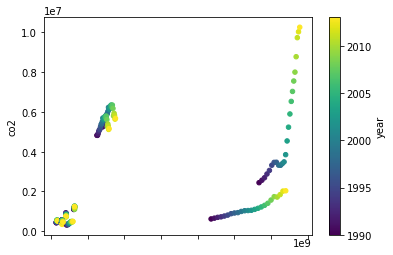

In [163]:
# Graficar Cuales son los 10 paises que producen mas CO2

# Creamos una serie como filtro a partir de la agrupacion, obteniendo solo el index que en este caso son los paises
first_10_country_CO2 = df_climate_merge.groupby(['Country'])['co2'].median().sort_values(
    ascending=False).to_frame().head(10).index
print(first_10_country_CO2)

# Usamos la serie para realizar el filtro sobre la columna country
df_max_CO2 = df_climate_merge[df_climate_merge['Country'].isin(first_10_country_CO2)]

"""
.set_index('Country')  // Especifica el indice de agrupacion
.plot.scatter // Define el tipo de grafico
  x='population', // Valores de eje x
  y='co2', // Valores de eje y
  c='year', // Valores que definiran la escala de colores
  colormap='viridis' // Tipo o tema de colores
"""
df_max_CO2.set_index('Country').plot.scatter(
    x='population',
    y='co2',
    c='year',
    colormap='viridis'
)


<AxesSubplot:>

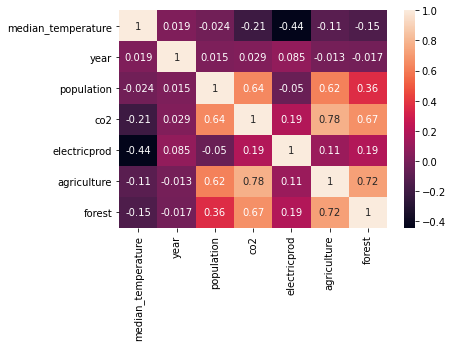

In [164]:
# .corr()
# Muestra la correlacion de todas las variables
df_climate_corr = df_climate_merge.corr()

# annot=True // permite ver los valores en las casillas
# Las variables en colores claros, estan mucho mas correlacionadas
sns.heatmap(df_climate_corr, annot=True)


<AxesSubplot:>

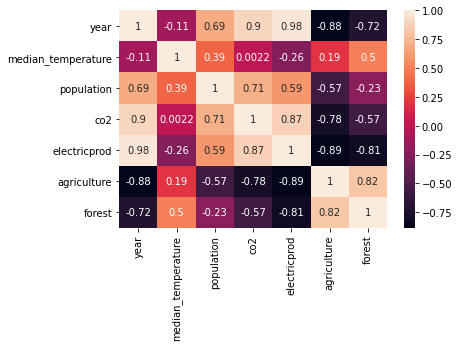

In [169]:
# Seleccioamos los valores filtrando el pais, y resetemamos el indice para contar el año
df_climate_col = df_climate_merge.loc[df_climate_merge['Country'] == 'Colombia']
df_climate_col_group_by_year = df_climate_merge.groupby(['year']).median().reset_index()
# Generamos la correlacion de variables con .corr()
df_climate_col_group_by_year_corr = df_climate_col_group_by_year.corr()

# annot=True // permite ver los valores en las casillas
# Las variables en colores claros, estan mucho mas correlacionadas
sns.heatmap(df_climate_col_group_by_year_corr, annot=True)

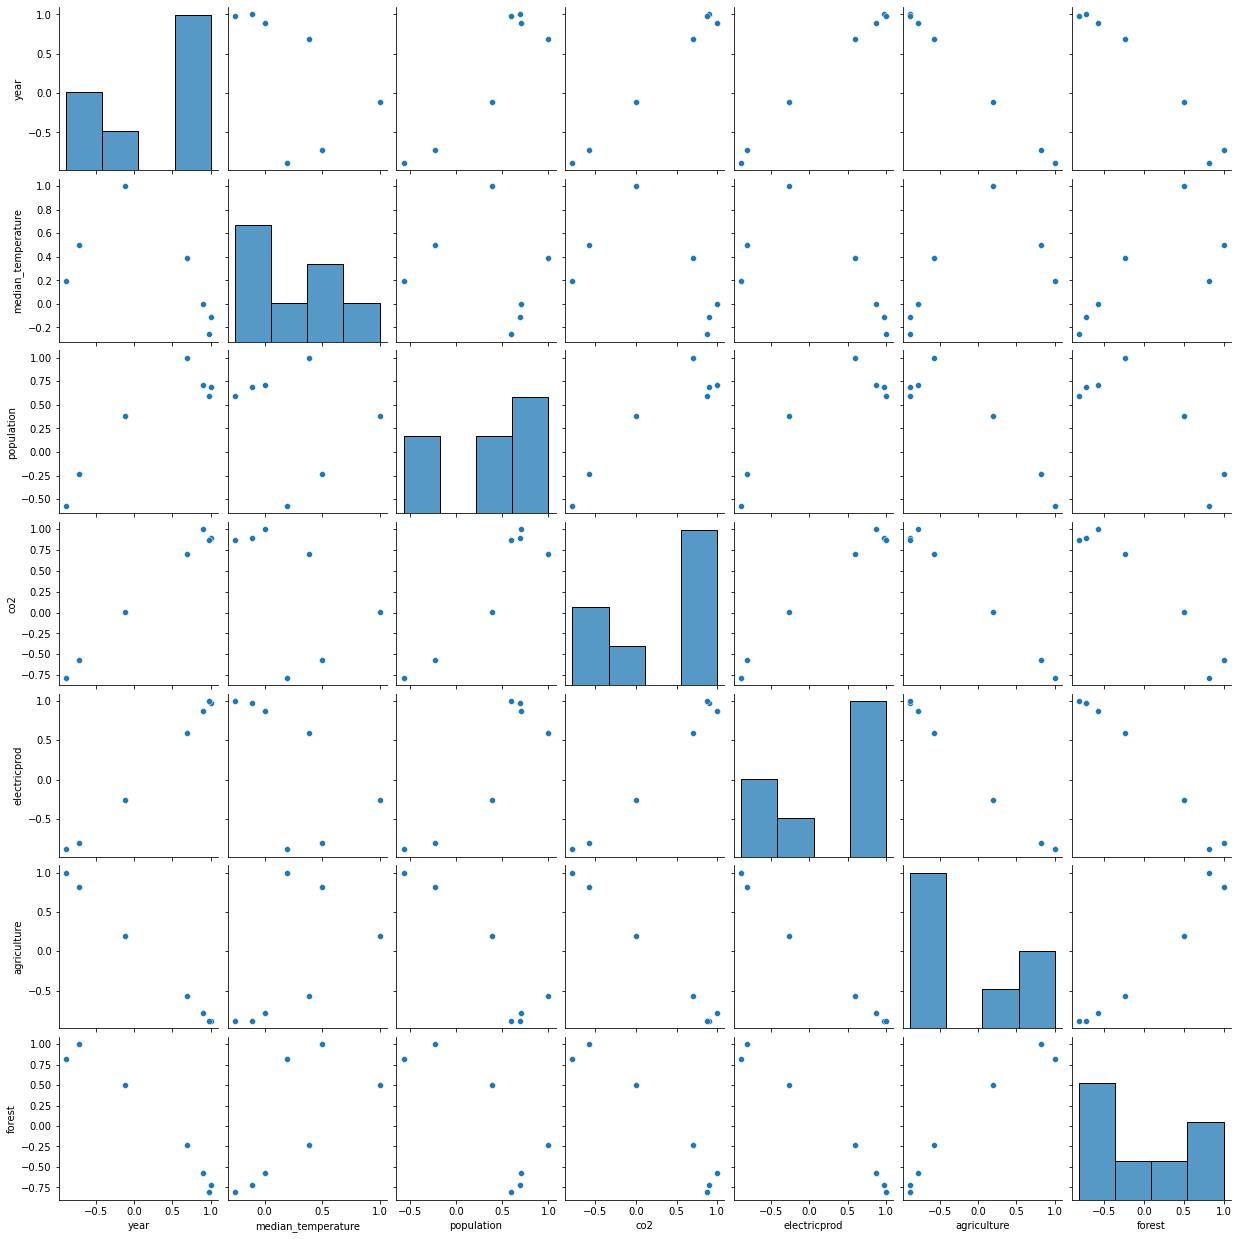

In [170]:
# Muestra todas los graficos posibles de skater
sns.pairplot(df_climate_col_group_by_year_corr)


In [175]:
# Filtrando registros por concidencias y seleccionando las columnas a usar
df_climate_suramerica = df_climate_merge[
    df_climate_merge['Country'].isin(['Colombia', 'Argentina', 'Bolivia'])
][['Country', 'median_temperature', 'co2',  'agriculture', 'forest']]

df_climate_suramerica

,Country,median_temperature,co2,agriculture,forest
284,Argentina,15.4,"112,147.9","1,275,650.0","347,930.0"
285,Argentina,14.9,"117,098.3","1,276,600.0","344,997.0"
286,Argentina,14.9,"121,352.0","1,277,550.0","342,064.0"
287,Argentina,15.5,"117,927.1","1,278,500.0","339,131.0"
288,Argentina,15.0,"122,408.1","1,279,480.0","336,198.0"
...,...,...,...,...,...
1579,Colombia,25.5,"72,661.6","425,400.0","589,485.3"
1580,Colombia,25.6,"76,174.6","425,030.0","586,353.2"
1581,Colombia,25.1,"76,530.3","417,210.0","586,086.0"
1582,Colombia,25.4,"79,951.6","426,176.0","585,818.9"


<AxesSubplot:>

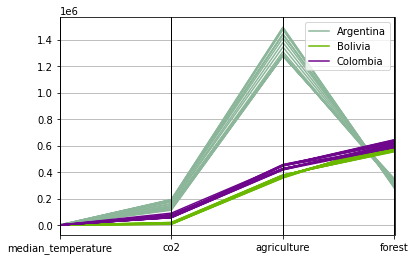

In [180]:
# Usando grafico de pandas para ver los datos en paralelo
# se especifica el df, y la columna principal
parallel_coordinates(df_climate_suramerica, 'Country')

In [181]:
[10,8,5,0] + [0,1,6,12]

[10, 8, 5, 0, 0, 1, 6, 12]